In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/housing.csv/housing.csv")

In [3]:
data.shape

(20640, 10)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### we have only one categorical feature that is "ocean_proximity", lets see how many levels it has.

In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##### As we can see it is having five levels

## Replacing unwanted symbols with numpy nan values

In [9]:
data['ocean_proximity']= data['ocean_proximity'].replace('$',np.nan)

## Checking for null values

In [10]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### As we can see that there are 207 null values in "total_bedrooms" 

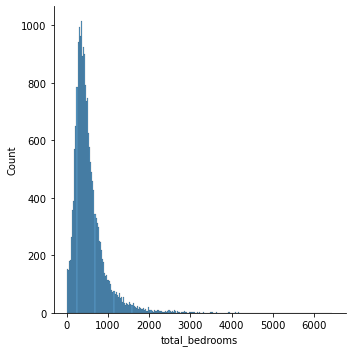

In [11]:
# let's check the distribution of this
sns.displot(data["total_bedrooms"])

## Using Median to fill missing data

In [12]:
# As we can see that the "total_bedrooms" is skewed so we can use median to fill the missing data
data["total_bedrooms"]= data["total_bedrooms"].fillna(data["total_bedrooms"].median())

In [13]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Checking for any duplicate value

In [14]:
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")

In [15]:
duplicate(data)

Dataframe doesn't contains dublicate Values


In [16]:
#Usually, median income of any neighborhood is great indicator of wealth distribution in that area.
#So, we want to make sure that test datasets is representative of various categories of income which is actually numeric variable.
#This means we have to convert it into categorical variables and create different levels of income and
#use stratified sampling instead of random sampling.

## Converting into Categorical value

<AxesSubplot:>

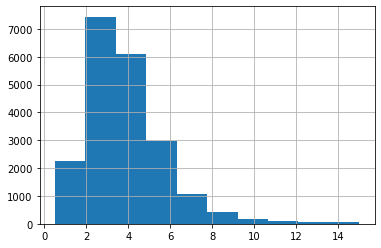

In [17]:
data["median_income"].hist()

<AxesSubplot:>

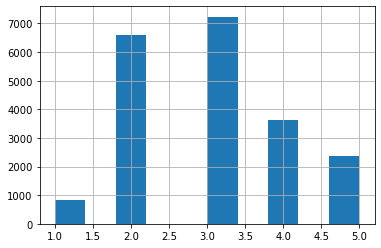

In [18]:
# Checking for the right number of bins for the response variable

data["income_cat"]= pd.cut(data["median_income"],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels= [1,2,3,4,5])
data["income_cat"].hist()

In [19]:
## Check if the strata worked for entire datasets
data["income_cat"].value_counts() / len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
# Startified sampling based on income_cat to make the datasets more random and representative

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [21]:
## Check if the strata worked for entire datasets
data["income_cat"].value_counts() / len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

## Data Visualization

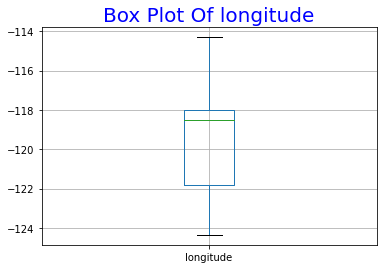

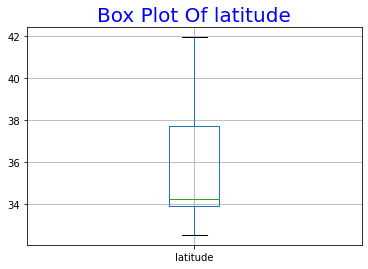

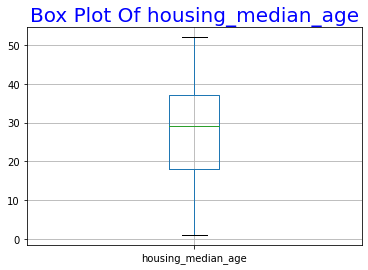

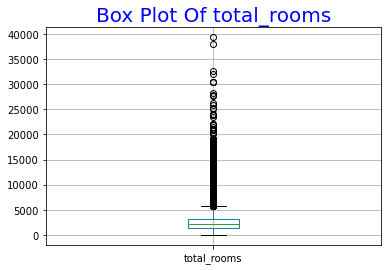

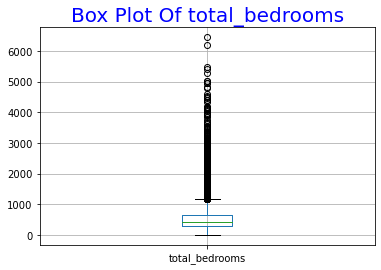

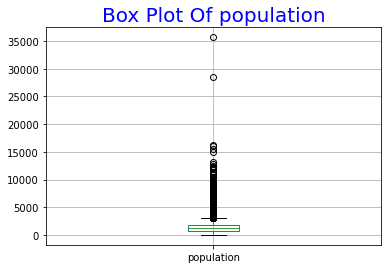

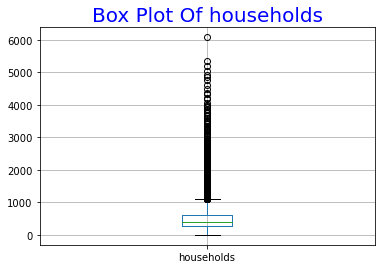

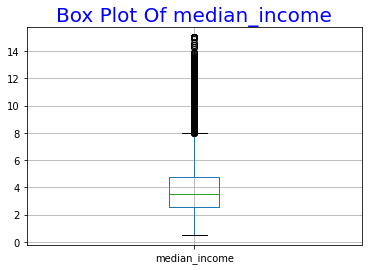

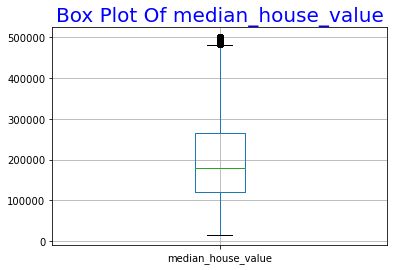

In [22]:
# boxplot all the numerical columns and see if there any outliers
for i in data.drop(['ocean_proximity','income_cat'],axis=1).iloc[:, :].columns:
    data.iloc[:, :].boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="Blue")
    plt.show()

In [23]:
## As we can see there are some outliers present

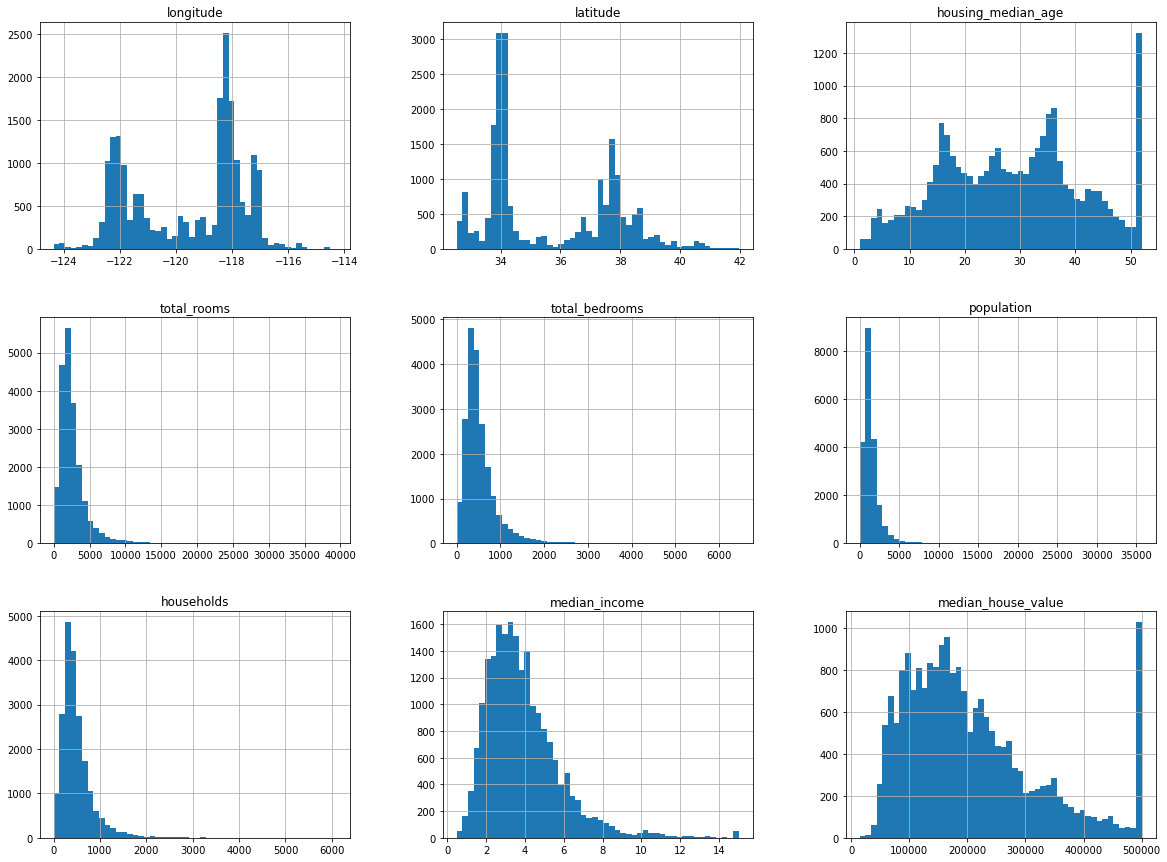

In [24]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
# We can quickly see that over 800 districts have median house value of around $100,000. Median income plot seems little strange, as data has been scaled and capped at 15 for higher median income and 0.5 for lower median incomes. Similarly, we can see that median age is capped at 50 and median house value is capped at $500,000. If capped value possess problem, we can either collect proper values for the capped values or remove those district for the data sets. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

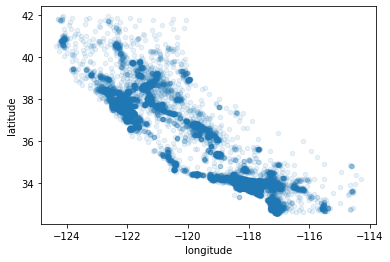

In [26]:
## Exploring high density areas

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [27]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Analysis of Ocean_proximity')

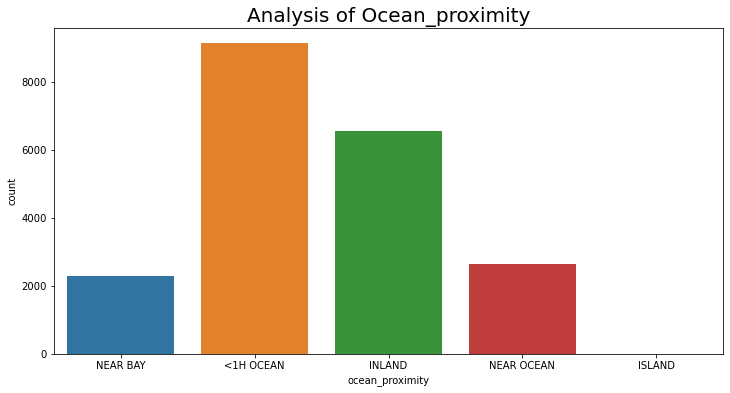

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='ocean_proximity',data=data)
plt.title(f"Analysis of Ocean_proximity" , fontsize=20,
          color="black")

In [29]:
# The value count for <1H OCEAN is maximum among all

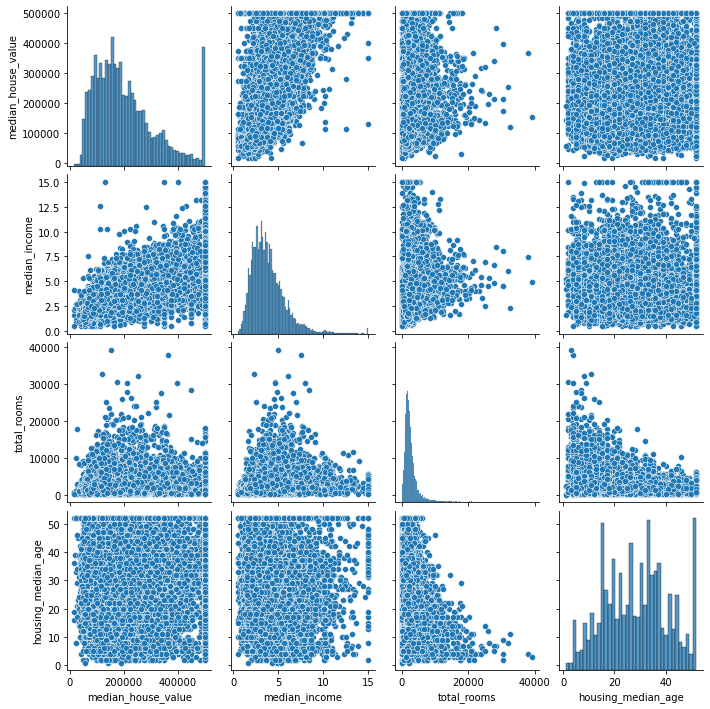

In [30]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
plt.rcParams['figure.figsize']=15,15
sns.pairplot(data[attributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

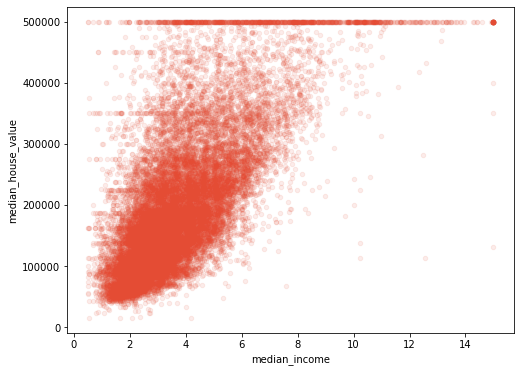

In [31]:
data.plot(kind="scatter",x="median_income",y="median_house_value",color='#e44c34',alpha=0.1,figsize=(8,6))

In [32]:
# This plot reveals a few things. First, the correlation is indeed very strong;
# you can clearly see the upward trend and the points are not too dispersed.

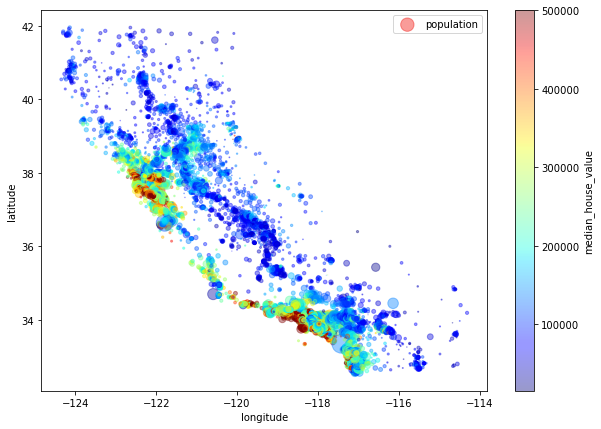

In [33]:
## Lets look at housing prices with circle representing district population and color representing price

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=data["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x504 with 0 Axes>

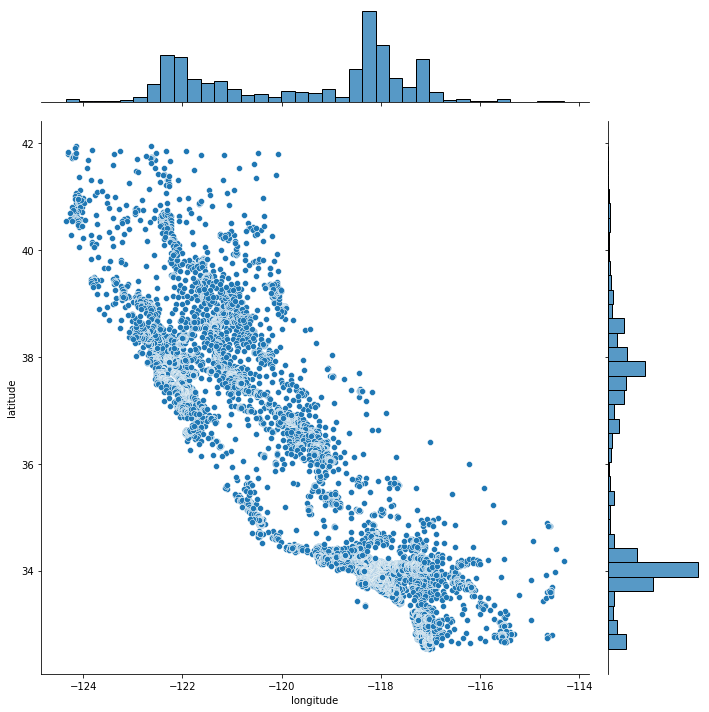

In [34]:
plt.figure(figsize=(10,7))
sns.jointplot(x=data.longitude, y=data.latitude, size=10)
plt.ylabel('Longitude', fontsize=17)
plt.xlabel('Latitude', fontsize=17)
plt.show()

## Feature Engineering

In [35]:
# we will create new feature that is "rooms_per_household","bedrooms_per_room", "population_per_household" as 
# The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

In [36]:
# Now, let’s look at the correlation table again to make sure that these new features are useful to predict our target variable.

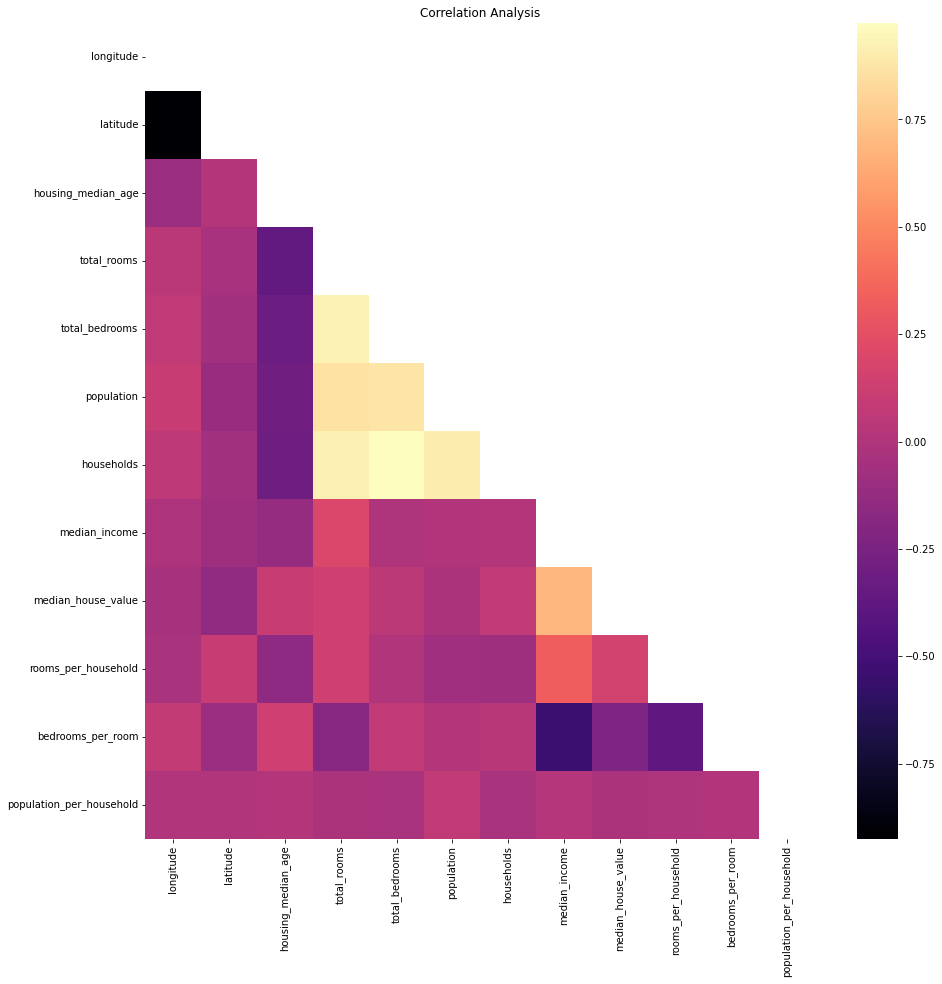

In [37]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.title('Correlation Analysis')
sns.heatmap(corr_matrix,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64